## K-Means Plot

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import datasets

# Initalization Matters

## Iteration 1 
Goal: Show how random initialization can effect outcome

Interactive Model: Will allow user to select random seed

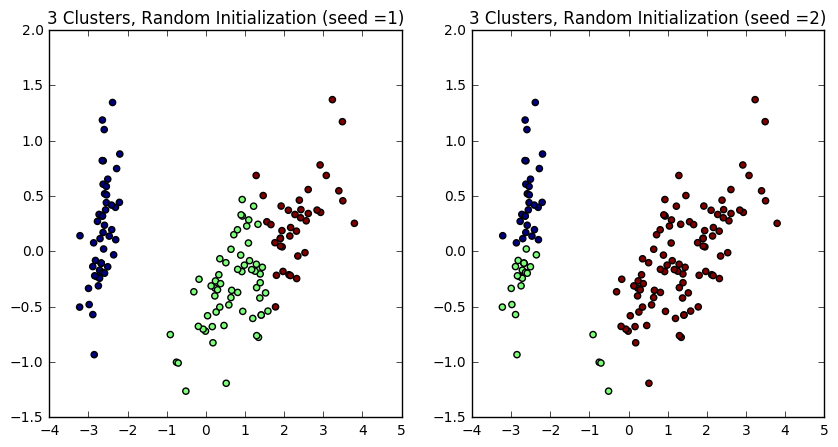

In [90]:
# Lets try dimensionality reduction with PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)

fig = plt.figure(figsize=(10, 5))
list_nums = [1,2]
for i in range(len(list_nums)):

    np.random.seed(list_nums[i])
    model1 = KMeans(n_clusters=3, n_init=1,init='random')
    model1.fit(pca_data)
    labels = model1.labels_
    sub_plot = fig.add_subplot(1,2,i+1)
    sub_plot.scatter(pca_data[:,0], pca_data[:,1], c = labels)
    title_i = "3 Clusters, Random Initialization (seed =" + str(list_nums[i]) + ")"
    plt.title(title_i)
plt.show()
    

## Iteration 2
does circles to the most distant point in the cluster help us visualize the closenes? No 

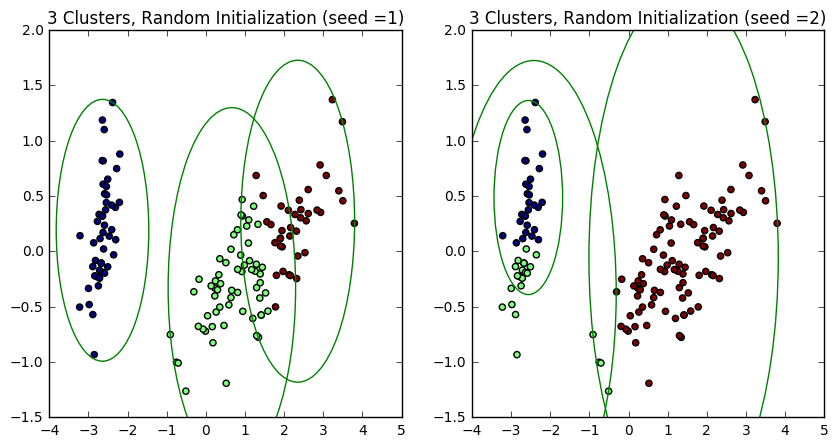

In [72]:
# Lets try dimensionality reduction with PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)

fig = plt.figure(figsize=(10, 5))
for i in [1,2]:
    np.random.seed(i)
    model1 = KMeans(n_clusters=3, n_init=1,init='random')
    model1.fit(pca_data)
    labels = model1.labels_
    centers = model1.cluster_centers_
    x_centers = [centers[x][0] for x in range(len(centers))]
    y_centers = [centers[x][1] for x in range(len(centers))]
    predicted_cluster = model1.predict(pca_data)
    max_dist = np.zeros(len(centers))
    for j in range(len(pca_data)):
        rel_cluster = centers[predicted_cluster[j]]
        euclid_x2 = (pca_data[j][0]-rel_cluster[0])**2
        euclid_y2 = (pca_data[j][1]-rel_cluster[1])**2
        euclid_dist = (euclid_x2 + euclid_y2)**(.5)
        #print euclid_dist #why the hell is this always 1
        if euclid_dist > max_dist[predicted_cluster[j]]:
            max_dist[predicted_cluster[j]]=euclid_dist
    sub_plot = fig.add_subplot(1,2,i)
    sub_plot.scatter(pca_data[:,0], pca_data[:,1], c = labels)
    title_i = "3 Clusters, Random Initialization (seed =" + str(i) + ")"
    for k in range(len(centers)):
        cir = plt.Circle(centers[k], radius = max_dist[k], color = 'g', fill = False)
        sub_plot.add_patch(cir)
    plt.title(title_i)
plt.show()
    

## Iteration 4
What about decision boundaries?
Should make circle colors match decision boundary colors

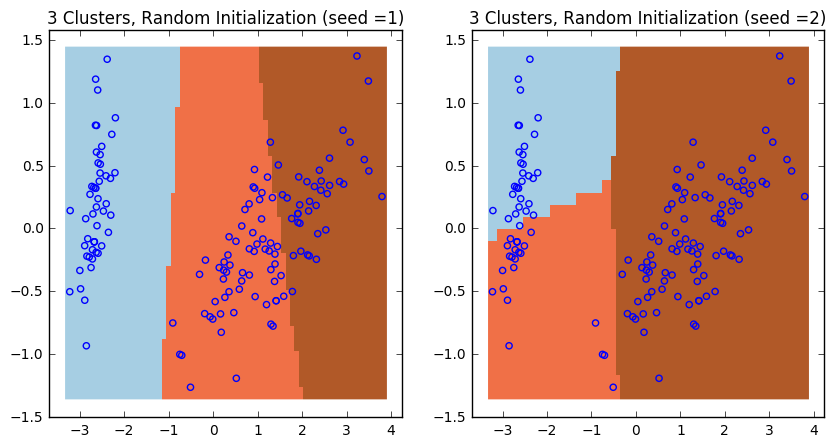

In [75]:

pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)


fig = plt.figure(figsize=(10, 5))
for i in [1,2]:

    np.random.seed(i)
   
    model1 = KMeans(n_clusters=3, n_init=1,init='random')
    model1.fit(pca_data)
    labels = model1.labels_
    offset = .1
    sub_plot = fig.add_subplot(1,2,i)
    x_min, x_max = pca_data[:, 0].min() - .1, pca_data[:, 0].max() + .1
    y_min, y_max = pca_data[:, 1].min() - .1, pca_data[:, 1].max() + .1
    x_range, y_range = np.meshgrid(np.arange(x_min, x_max, offset), np.arange(y_min, y_max, offset))
    pred_points = model1.predict(np.c_[x_range.ravel(), y_range.ravel()])
    pred_points = pred_points.reshape(x_range.shape)
    sub_plot.imshow(pred_points, interpolation='nearest',
           cmap=plt.cm.Paired,extent=(x_range.min(), x_range.max(), y_range.min(), y_range.max()),
           aspect='auto', origin='lower')
    sub_plot.scatter(pca_data[:,0], pca_data[:,1],facecolors='none', edgecolors='b')
    title_i = "3 Clusters, Random Initialization (seed =" + str(i) + ")"
    plt.title(title_i)
plt.show()

## Iteration 3
what about 3 d?

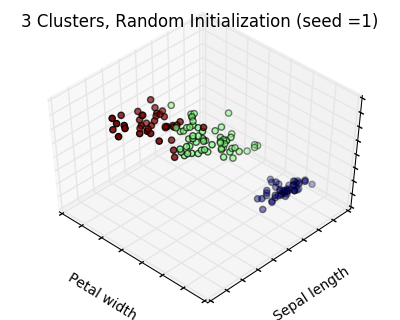

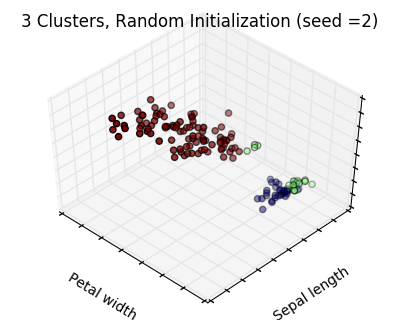

In [76]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

for i in [1,2]:

    np.random.seed(i)
    fig = plt.figure(1, figsize=(4, 3))
    #title = plt.title("Test")
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    model1 = KMeans(n_clusters=3, n_init=1,init='random')
    model1.fit(X)
    labels = model1.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    title_i = "3 Clusters, Random Initialization (seed =" + str(i) + ")"
    plt.title(title_i)
    plt.show()


Which of these is more clear? I'm leaning 2D is more clear but 3D looks nicer.


## Number of Clusters

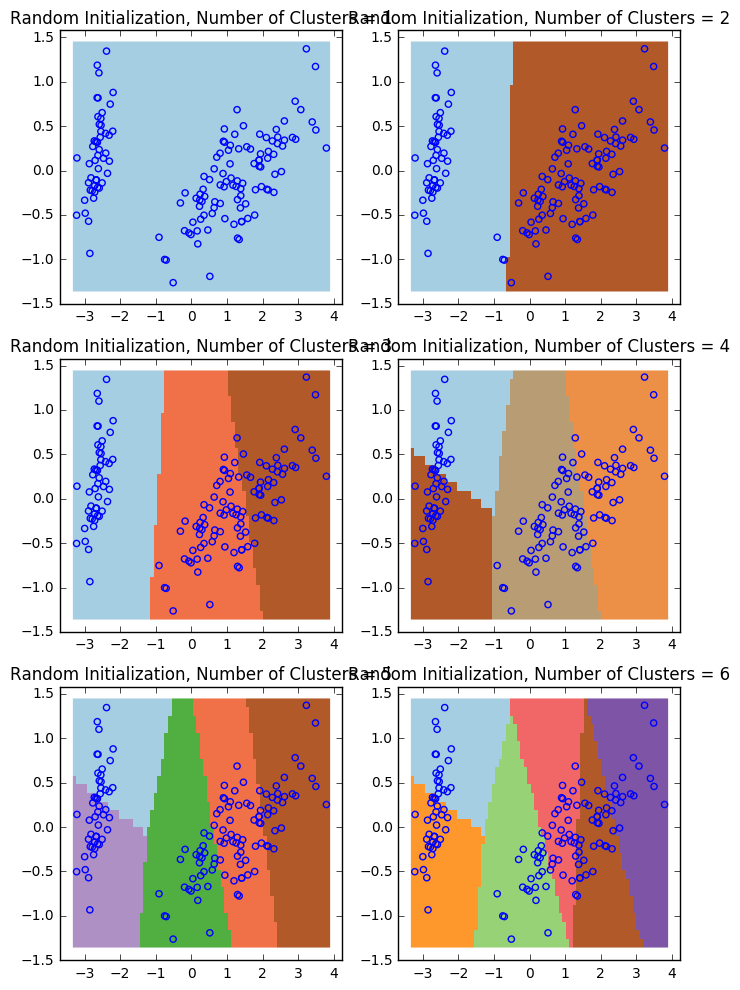

In [119]:

pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)


fig = plt.figure(figsize=(8,12))
for i in range(1,7):

    np.random.seed(1)
   
    model1 = KMeans(n_clusters=i, n_init=1,init='random')
    model1.fit(pca_data)
    labels = model1.labels_
    offset = .1
    sub_plot = fig.add_subplot(3,2,i)
    x_min, x_max = pca_data[:, 0].min() - .1, pca_data[:, 0].max() + .1
    y_min, y_max = pca_data[:, 1].min() - .1, pca_data[:, 1].max() + .1
    x_range, y_range = np.meshgrid(np.arange(x_min, x_max, offset), np.arange(y_min, y_max, offset))
    pred_points = model1.predict(np.c_[x_range.ravel(), y_range.ravel()])
    pred_points = pred_points.reshape(x_range.shape)
    sub_plot.imshow(pred_points, interpolation='nearest',
           cmap=plt.cm.Paired,extent=(x_range.min(), x_range.max(), y_range.min(), y_range.max()),
           aspect='auto', origin='lower')
    sub_plot.scatter(pca_data[:,0], pca_data[:,1],facecolors='none', edgecolors='b')
    title_i = "Random Initialization, Number of Clusters = " + str(i)  
    plt.title(title_i)
plt.show()

# Interactivity: Showing model convergence

## have to finish code

In [102]:
import random
from matplotlib.colors import LogNorm
from matplotlib.colors import LinearSegmentedColormap

In [115]:
def k_means_iter(data,k, num_iter = 1):
    clusters = random.sample(pca_data, k)
    x_centers = [clusters[x][0] for x in range(len(clusters))]
    y_centers = [clusters[x][1] for x in range(len(clusters))]
    plt.clf()
    fig = plt.figure(figsize=(12, 12))
    for i in range(1, num_iter +1):
        sub_plot = fig.add_subplot(3,3,i)
        cluster_name =[]
        for i in range(len(data)):
            cluster_assign = -1
            euclid_dist_min = 100
            for j in range(len(clusters)):
                euclid_x2 = (data[i][0]-x_centers[j])**2
                euclid_y2 = (data[i][1]-y_centers[j])**2
                euclid_dist = (euclid_x2 + euclid_y2)**(.5)
                if euclid_dist < euclid_dist_min:
                    cluster_assign = j
                    euclid_dist_min = euclid_dist
            cluster_name.append(cluster_assign)
        #cmap = LinearSegmentedColormap.from_list('mycmap', [(0, "red"), (1, "blue"), (2, "green")])
        #sub_plot.scatter(data[:,0], data[:,1], c = color_cluster, cmap = cmap)
        sub_plot.scatter(data[:,0], data[:,1], c = cluster_name)
        title_i = "3 Clusters, Iterations " + str(num_iter)
        x_center = []
        y_center =[]
        print data.shape
        for m in range(k):
            ## just have to figure out data cluster assignment
            data_cluster = data[cluster_name==m]
            print data_cluster.shape
            x_center_temp = np.mean([data_cluster[x][0] for x in range(len(data_cluster))])
            y_center_temp = np.mean([data_cluster[x][0] for x in range(len(data_cluster))])
            x_center.append(x_center_temp)
            y_center.append(y_center_temp)
    plt.title(title_i)
    plt.show()
k_means_iter(pca_data,3,1)

(150, 2)
(2,)


/Users/sarahkelley/anaconda/envs/tensorflow/lib/python2.7/site-packages/ipykernel/__main__.py:29: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future


IndexError: invalid index to scalar variable.


estimators = {'k_means_iris_3': KMeans(n_clusters=3),
              'k_means_iris_8': KMeans(n_clusters=8),
              'k_means_iris_bad_init': KMeans(n_clusters=3, n_init=1,
                                              init='random')}


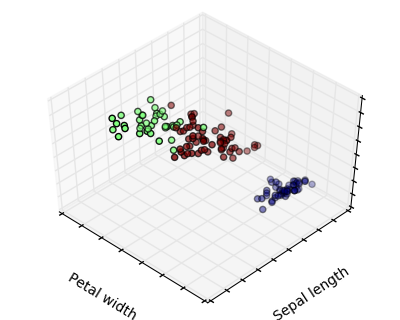

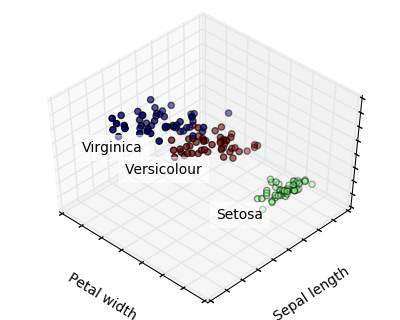

In [3]:
print(__doc__)

# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause


np.random.seed(5)

#centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

'''
estimators = {'k_means_iris_3': KMeans(n_clusters=3),
              'k_means_iris_8': KMeans(n_clusters=8),
              'k_means_iris_bad_init': KMeans(n_clusters=3, n_init=1,
                                              init='random')}'''
estimators = {'k_means_iris_3': KMeans(n_clusters=3, n_init=1,
                                              init='random')}

fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(4, 3))
    #title = plt.title("Test")
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    plt.cla()
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.show()

https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

The visualization could be prettier, but I like the idea of clicking to update the model (or maybe just having it run automatically over time).

3D or 2D plots? (easy to reduce by PCA to 2d, but 3d might look cooler).

## Linear Regression

Harder to imagine how to visualize regression interestingly, this looks like a reasonable approach:
    
http://shiny.stat.calpoly.edu/3d_regression/